# INSURANCE PREDICTOR 

In [1]:
## import necessary packages 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
## load the dataset .

In [5]:
dataset = pd.read_csv('Dataset/insurance.csv')

In [6]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
dataset.smoker.unique()

array(['yes', 'no'], dtype=object)

In [11]:
dataset.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [7]:
## regions and smoker are categorical . 
## in terms of insurance smoker can play an important role so lets encode it .

In [9]:
## we will use OHE encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder

##create an instance of Onehotencoder
encoder=OneHotEncoder()

## perform fit and transform
encoded=encoder.fit_transform(dataset[['smoker']]).toarray()

encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [15]:
encoder_df.head()

,smoker_no,smoker_yes
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [16]:
## now lets concat this .but before drop smoker 

In [18]:
dataset.drop('smoker',axis=1,inplace=True)

In [17]:
dataset = pd.concat([dataset,encoder_df],axis=1)

In [19]:
dataset.head()

,age,sex,bmi,children,region,charges,smoker_no,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,0.0,1.0
1,18,male,33.770,1,southeast,1725.55230,1.0,0.0
2,28,male,33.000,3,southeast,4449.46200,1.0,0.0
3,33,male,22.705,0,northwest,21984.47061,1.0,0.0
4,32,male,28.880,0,northwest,3866.85520,1.0,0.0


In [26]:
## regions is a factor for variables like - housing,trip and not for insurance so lets drop it .
## sex is not a factor also so lets drop it too.

In [21]:
dataset.drop('region',axis=1,inplace=True)

In [27]:
dataset.drop('sex',axis=1,inplace=True)

In [28]:
dataset.head()

,age,bmi,children,charges,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,0.0,1.0
1,18,33.770,1,1725.55230,1.0,0.0
2,28,33.000,3,4449.46200,1.0,0.0
3,33,22.705,0,21984.47061,1.0,0.0
4,32,28.880,0,3866.85520,1.0,0.0


In [40]:
dataset.corr()

,age,bmi,children,charges,smoker_no,smoker_yes
age,1.000000,0.109272,0.042469,0.299008,0.025019,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,-0.003750,0.003750
children,0.042469,0.012759,1.000000,0.067998,-0.007673,0.007673
charges,0.299008,0.198341,0.067998,1.000000,-0.787251,0.787251
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,1.000000,-1.000000
smoker_yes,-0.025019,0.003750,0.007673,0.787251,-1.000000,1.000000


In [29]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'smoker_no', 'smoker_yes'], dtype='object')

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   bmi         1338 non-null   float64
 2   children    1338 non-null   int64  
 3   charges     1338 non-null   float64
 4   smoker_no   1338 non-null   float64
 5   smoker_yes  1338 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 62.8 KB


In [ ]:
## now lets strart the ML part

## STEP 1 - SEPERATE THE INDEPENDENT AND THE DEPENDENT VARIABLES 

In [31]:
X=dataset[['age', 'bmi', 'children','smoker_no', 'smoker_yes']] ##independent feature( DataFrame . not array)
y=dataset['charges'] ## dependent feature array . 
## Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=12)## 30% data for test 

## STEP 2 - STANDARDIZATION 

In [32]:
## standardize the dataset Train independent data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

## STEP 3 - CREATE A MODEL 

In [33]:
## Train the Linear Regression Model
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()

regressor.fit(X_train,y_train) ## train the model

LinearRegression()

In [34]:
## see the slope and intercept.

In [35]:
print("The slope or coefficient of weight is ",regressor.coef_)
print("Intercept:",regressor.intercept_)

The slope or coefficient of weight is  [ 3679.08426999  2100.39887942   363.27425601 -4949.87052884
  4949.87052884]
Intercept: 13554.73261695406


### NOTE - We cannot get a graph as this is multidimensional

## STEP 4 - PREDICTION WITH RESPECT  THE TEST DATA AND COMAPRISION

In [37]:
y_pred_test=regressor.predict(X_test)

In [41]:
pd.DataFrame({'Predicted_Charges':y_pred_test,'Actual_Charges':y_test}).head()

,Predicted_Charges,Actual_Charges
936,9529.598083,32108.66282
728,5814.914133,2217.60120
1307,30496.481582,21472.47880
924,6399.996521,6250.43500
137,1637.177317,2045.68525


## CHECK IF THE MODEL GOT OVERFITTED OR UNDERFITTED.

In [ ]:
## check acuuracy for training dataset

In [42]:
from sklearn.metrics import r2_score
score_training=r2_score(y_train,regressor.predict(X_train)) # gives the accuracy

In [43]:
score_training

0.7692368255374334

In [44]:
## check acuuracy for test dataset.

In [45]:
score_test=r2_score(y_test,y_pred_test) # gives the accuracy

In [46]:
score_test

0.6949314973022636

### ACCURACY FOR TRAINING DATASET - 76% . ACCURACY FOR TRAINING DATASET - 69% . 

## LETS SEE SOME GRAPHICAL ASSUMPTIONS

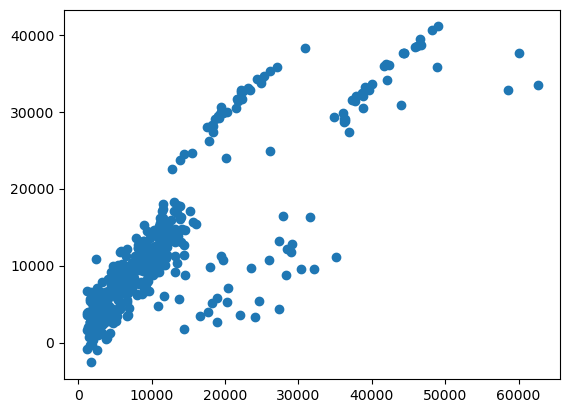

In [49]:
## Assumptions
## plot a scatter plot for the prediction
plt.scatter(y_test,y_pred_test) # predicted points vs actual points 

## if this follows a linear pattern - a model is well trained .


<AxesSubplot: xlabel='charges', ylabel='Density'>

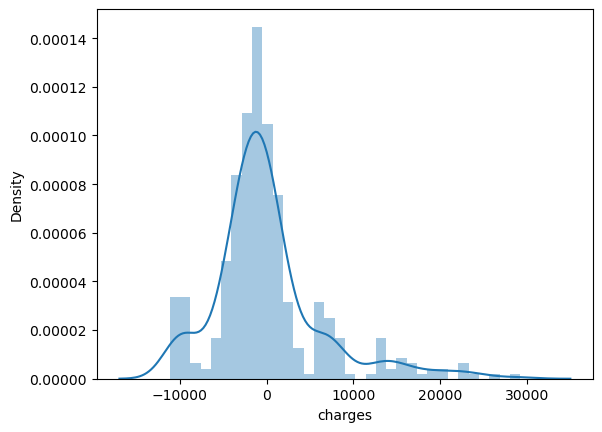

In [50]:
## Residuals
residuals=y_test-y_pred_test

## plot this residuals
import seaborn as sns
sns.distplot(residuals,kde=True)

## If you get a gaussian distribution the model is good .

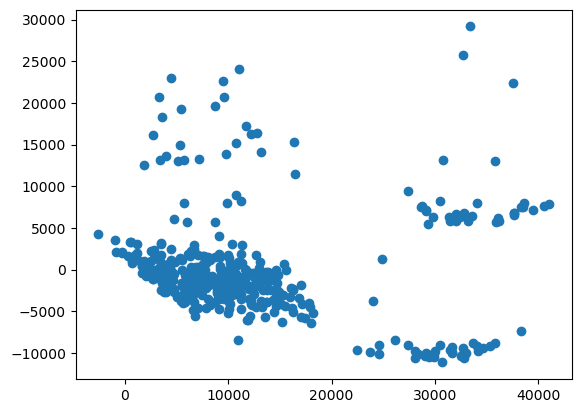

In [51]:

## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(y_pred_test,residuals)

## If we get a unifromly scattered plot , the model is good . 


# THANK YOU 